In [25]:
library(igraph)

In [26]:
g<- barabasi.game(1000,m=1,directed=F)

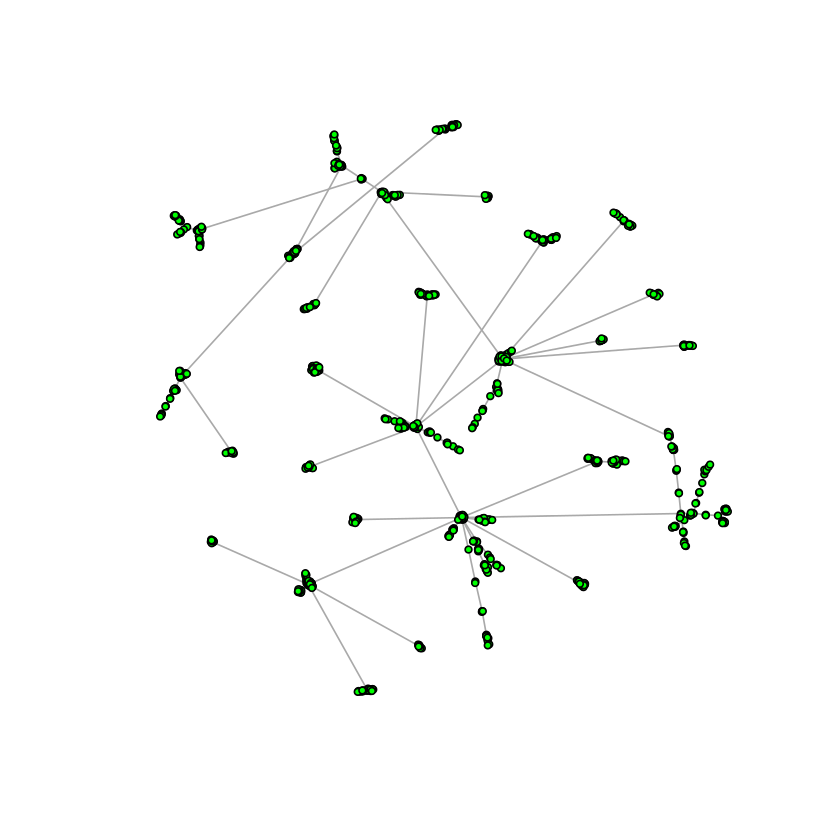

In [27]:
plot(g,vertex.color='green',vertex.size=2, vertex.label=NA)

In [47]:
getModularity<-function(g){
    fg <- fastgreedy.community(g,modularity=T)
    cmsize <- sizes(fg)
    print(cmsize)
    modularity(g, fg$membership)
}

getModularity(g)

Community sizes
 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
54 45 49 46 40 63 37 36 34 45 30 28 27 28 26 25 29 25 25 22 22 21 26 20 19 18 
27 28 29 30 31 32 33 34 35 36 37 
16 16 16 16 15 16 14 13 16 12 10 


[1] 0.930213

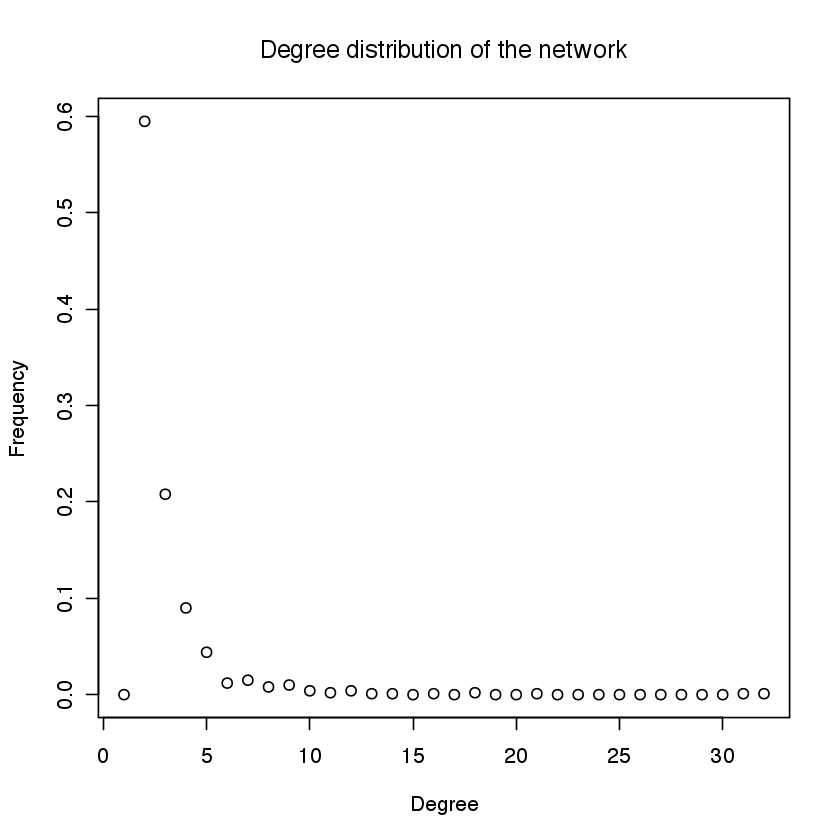

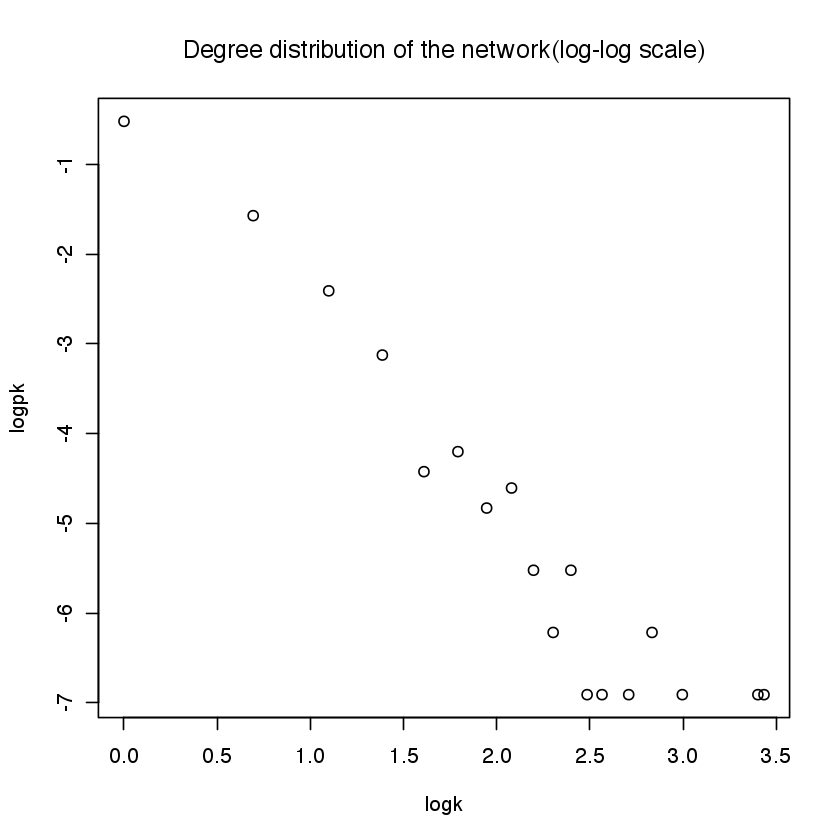

In [222]:
plotLoglog<-function(g){
    plot(degree.distribution(g),main="Degree distribution of the network",xlab="Degree",ylab="Frequency")
    #print(degree.distribution(g))
    logpk=log(degree.distribution(g))
    logk=log(seq(0,length(degree.distribution(g))-1))
    plot(logk,logpk,main="Degree distribution of the network(log-log scale)") 
}

plotLoglog(g)

In [39]:
getAlpha<-function(g){
    d <- degree(g)
    fit <- fit_power_law(d,xmin=1)
    return(fit$alpha)
}

In [40]:
getAlpha(g)

[1] 2.187172

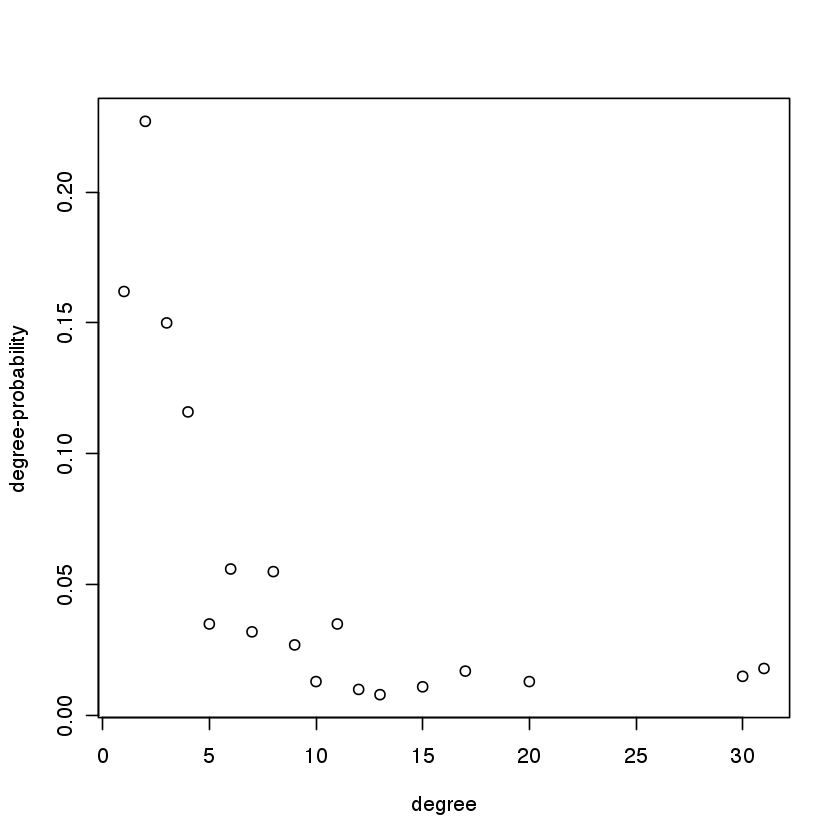

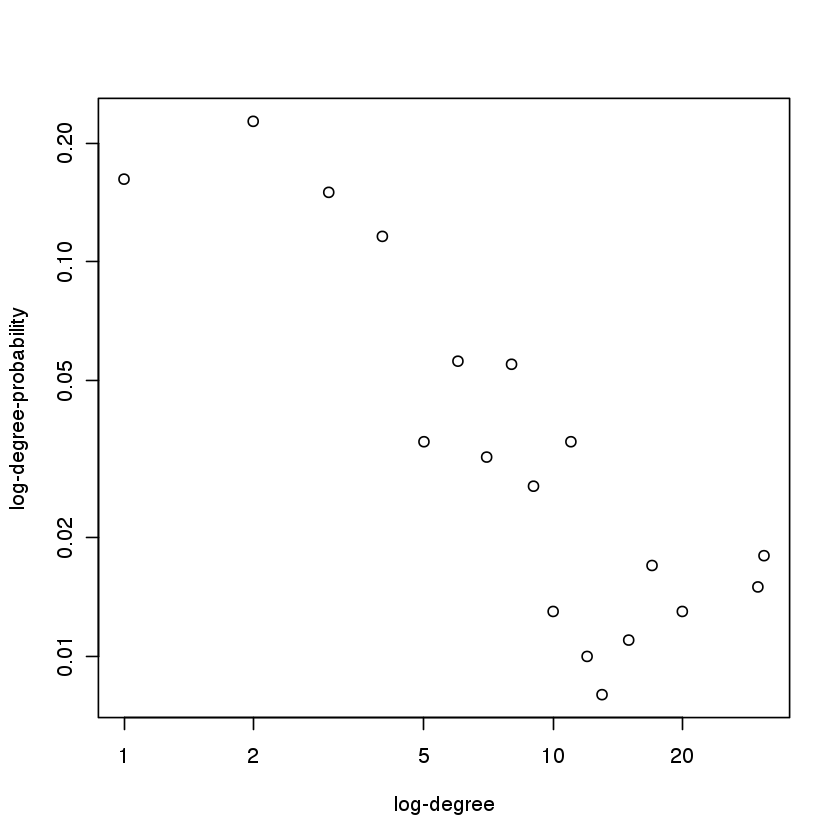

In [224]:
numSample=1000
nodes<-sample(1:1000,numSample,replace=T)
degrees<-rep(0,numSample)
for(i in 1:numSample){
    neighs=neighbors(g,nodes[i])
    randNeighbor=sample(1:length(neighs),1)
    d=degree(g,neighs[randNeighbor])
    degrees[i]=d
}
prob <- table(degrees)/numSample
plot(as.numeric(names(prob)),as.numeric(prob),xlab='degree',ylab='degree-probability')
plot(as.numeric(names(prob)),as.numeric(prob),log='xy',xlab='log-degree',ylab='log-degree-probability')
#hist(degrees)


In [165]:
g10000<- barabasi.game(10000,m=1,directed=F)

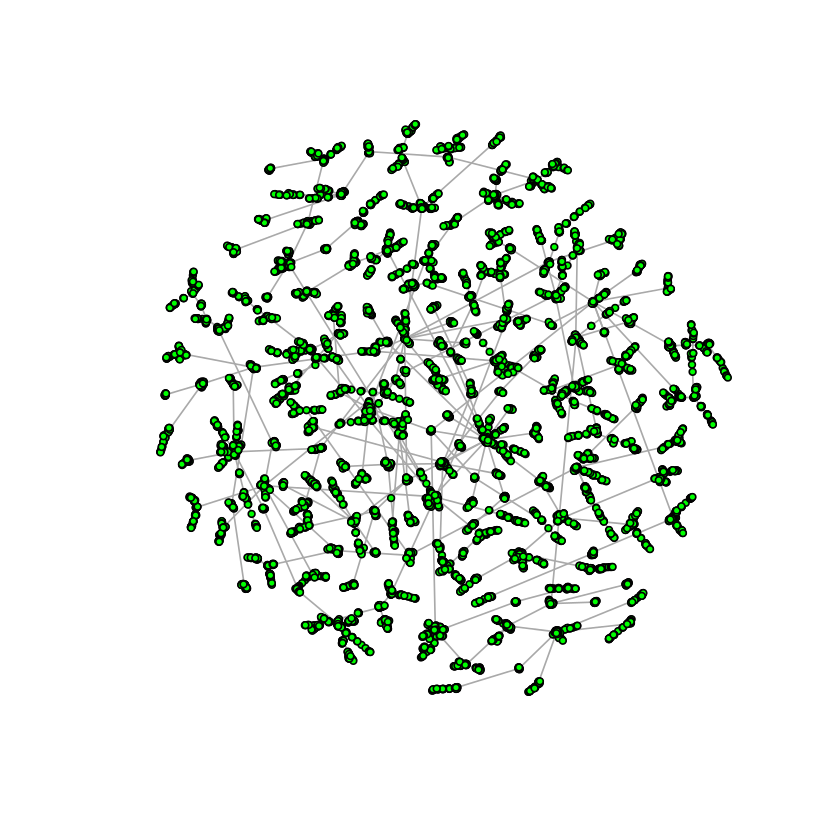

In [20]:
plot(g10000,vertex.color='green',vertex.size=2, vertex.label=NA)

In [48]:
getModularity(g10000)

Community sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
163 141 140 165 137 136 178 145 133 165 133 131 152 209 145 131 143 135 123 138 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
129 124 123 122 112 113 146 113 124 119 111 108 109 109 115 135 110 126 103 135 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
102 126  97 101  99  97 105  98  99 115 104  89 102  91 103  95  87  83  93  81 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
 79  88  77  82  77  74  92  79  69  71  67  69 100  65  63  64  62  62  65  62 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
 57  65  54  55  58  66  51  54  52  53  57  49  46  56  48  50  41  41  42  44 
101 102 103 104 105 106 
 38  37  37  34  28  24 


[1] 0.9785129

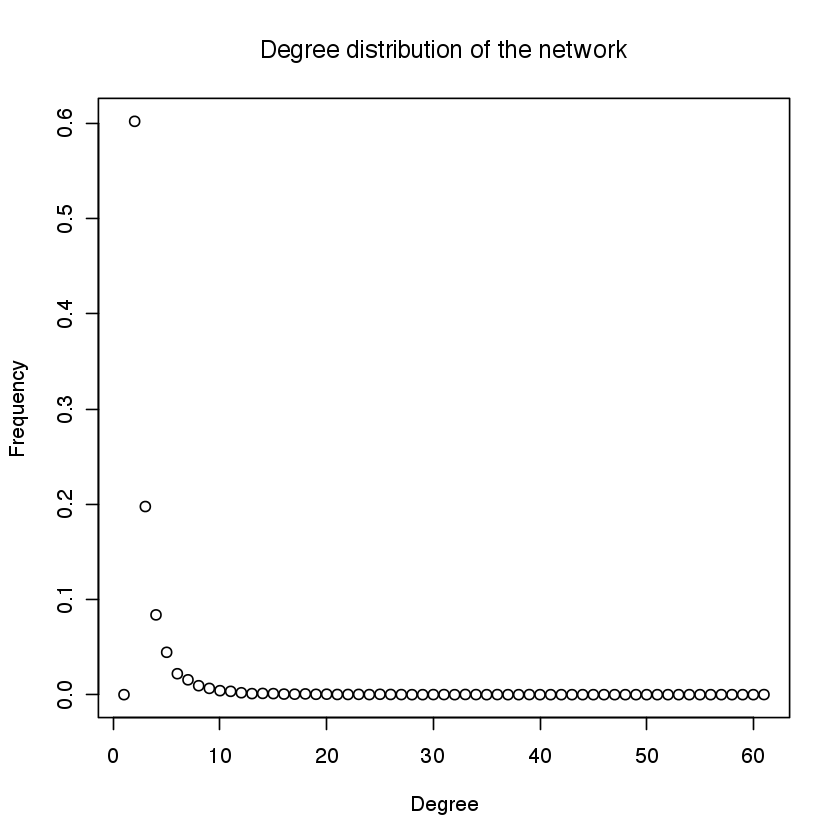

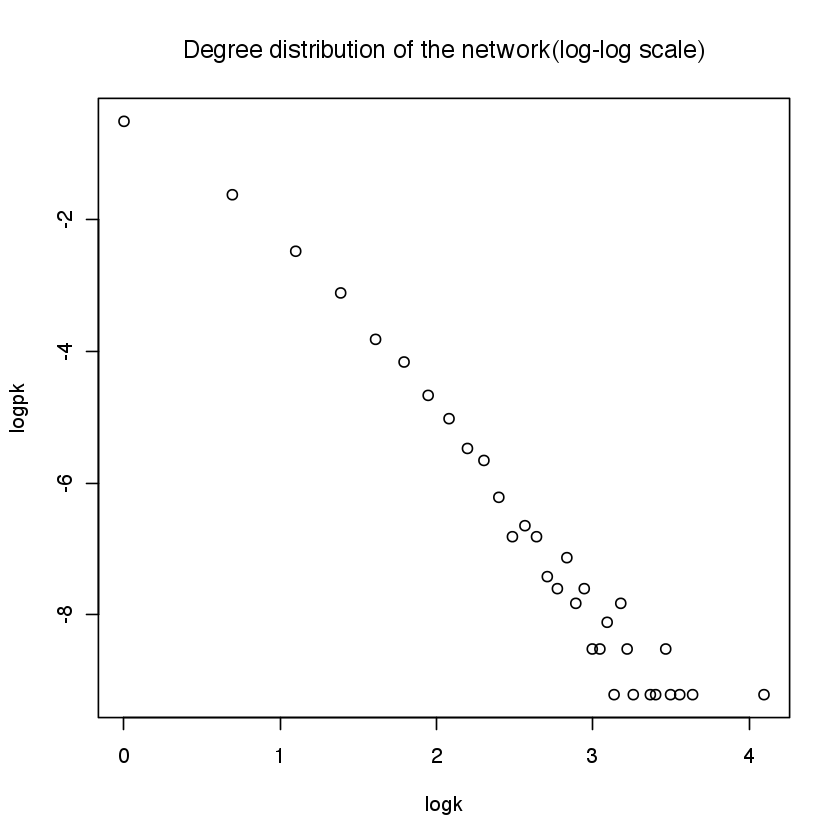

In [50]:
plotLoglog(g10000)

In [42]:
getAlpha(g10000)

[1] 2.187584

In [56]:
avgDegree<-function(age,t,m){
    return(m*sqrt(t/(t-age+1)))
}

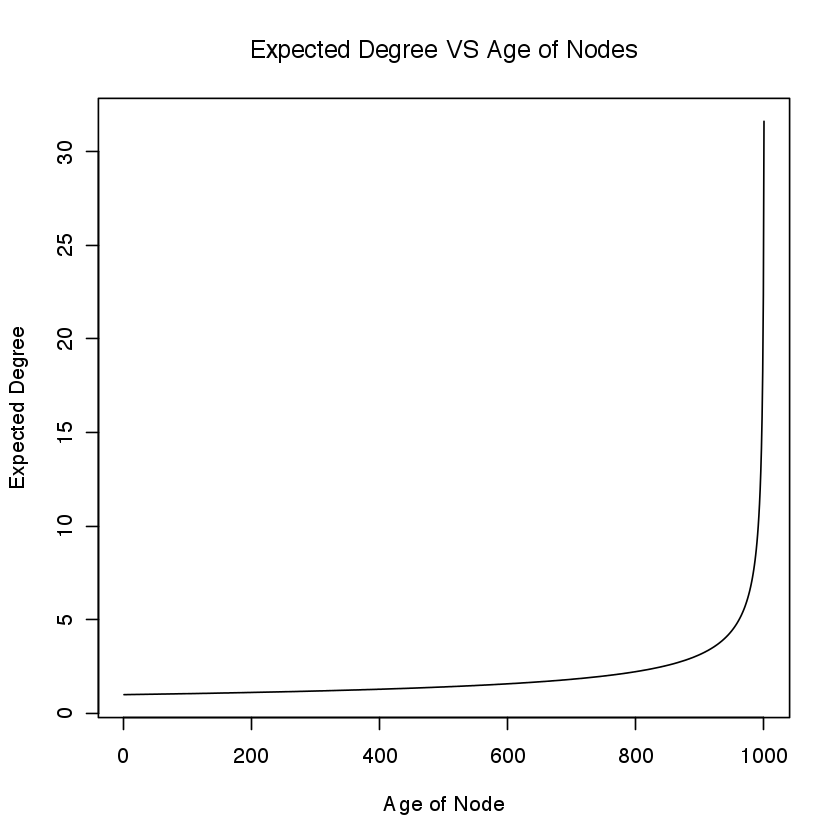

In [94]:
timestep=1000
agesequence<-seq(1,timestep)
plot(agesequence,avgDegree(agesequence,timestep,m=1),type='l',main="Expected Degree VS Age of Nodes",xlab="Age of Node",ylab="Expected Degree")

In [237]:
pa<- barabasi.game(1000,m=1,directed=F)

In [251]:
sm<- degree.sequence.game(degree(pa))

In [252]:
degree.distribution(pa)
degree.distribution(sm)

[1] 0.000 0.606 0.184 0.082 0.052 0.022 0.015 0.016 0.008 0.003 0.003 0.002
[13] 0.000 0.003 0.000 0.001 0.000 0.001 0.000 0.001 0.000 0.000 0.000 0.000
[25] 0.000 0.001

[1] 0.000 0.606 0.184 0.082 0.052 0.022 0.015 0.016 0.008 0.003 0.003 0.002
[13] 0.000 0.003 0.000 0.001 0.000 0.001 0.000 0.001 0.000 0.000 0.000 0.000
[25] 0.000 0.001

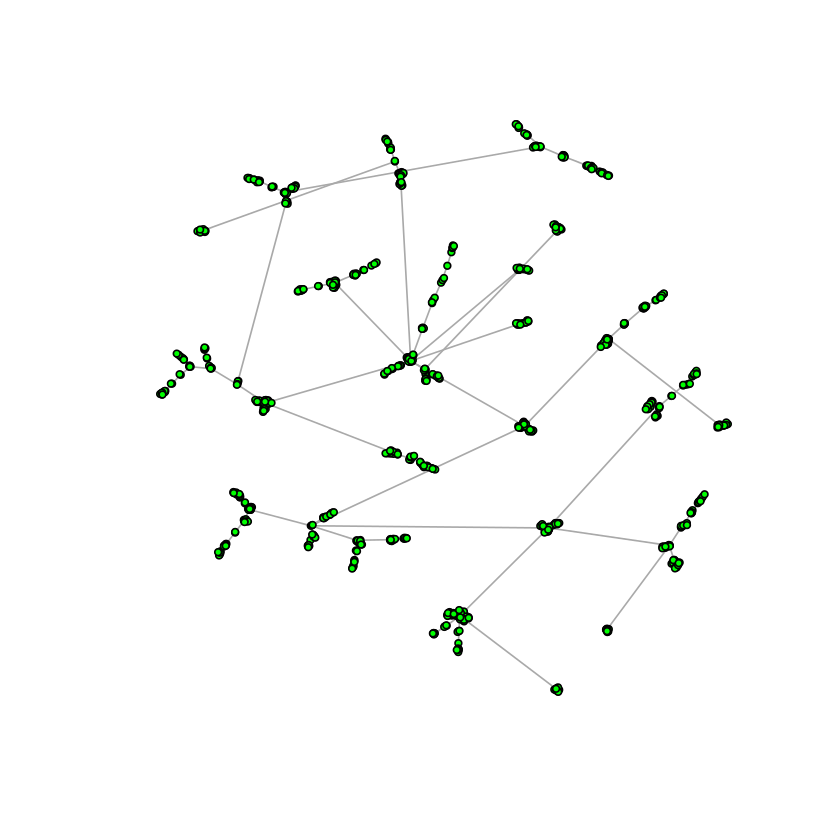

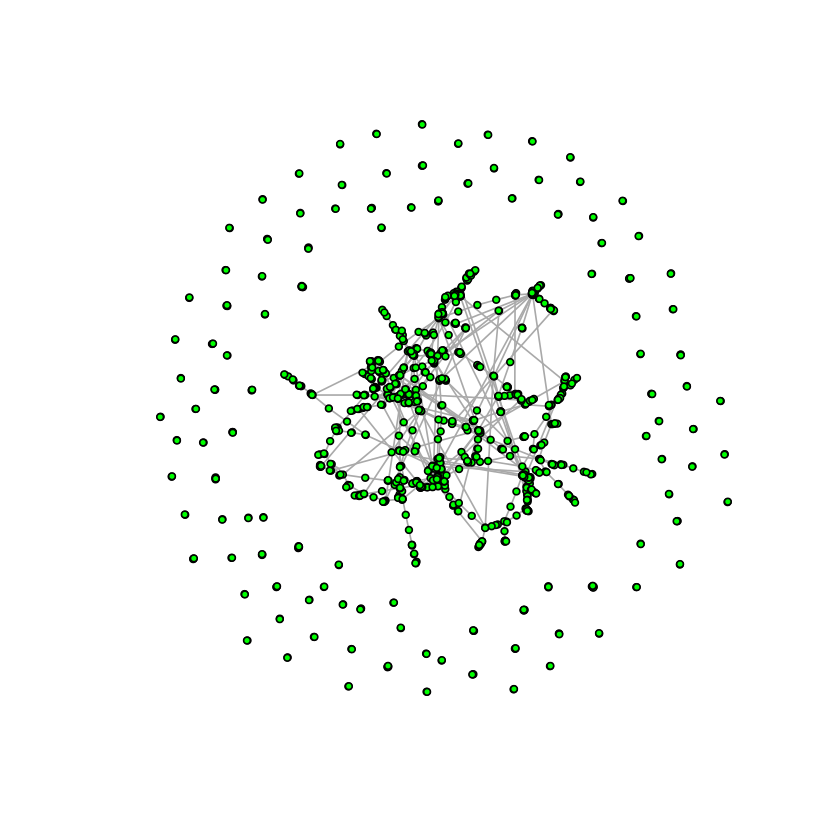

In [253]:
plot(pa,vertex.color='green',vertex.size=2, vertex.label=NA)
plot(sm,vertex.color='green',vertex.size=2, vertex.label=NA)

In [254]:
getModularity(pa)
wtc <- cluster_walktrap(pa)
modularity(pa, membership(wtc))

wtc <- cluster_walktrap(sm)
modularity(sm, membership(wtc))
#getModularity(sm)

Community sizes
 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
43 56 46 43 41 45 38 40 38 41 36 31 30 31 31 29 29 27 27 26 25 24 22 20 20 20 
27 28 29 30 31 32 33 34 35 
18 19 18 16 16 17 15 11 11 


[1] 0.9326624

[1] 0.8569315

[1] 0.7425278